In [1]:
import neptune
from neptunecontrib.monitoring.metrics import expand_prediction, log_class_metrics, log_binary_classification_metrics, log_classification_report,log_confusion_matrix,log_prediction_distribution
from neptunecontrib.api import log_table
import os
from dotenv import load_dotenv

load_dotenv()
NEPTUNE_PROJECT= os.getenv('NEPTUNE_PROJECT')
NEPTUNE_API_TOKEN = os.getenv(('NEPTUNE_API_TOKEN'))
neptune.init(project_qualified_name= NEPTUNE_PROJECT,api_token=NEPTUNE_API_TOKEN) 
             

Project(codekcg23/Research-Experiments)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
#from sklearn.metrics import accuracy_score, f1_score, precision_score,roc_curve,roc_auc_score,confusion_matrix,recall_score
from sklearn.pipeline import Pipeline
import re
import gensim
pd.set_option('display.max_colwidth', 1000)
# import helper function script
import sys
sys.path.insert(1,'G:\\Github\\Sinhala-Hate-Speech-Detection')
import utills
import sinhala_stemmer

In [3]:
# load datasets
path = '../Datasets/processed/no_preprocessing/'
df_A = pd.read_csv(path+'df_A.csv')    
df_B = pd.read_csv(path+'df_B.csv')    # fb dataset -kaggle 
df_A_B = pd.read_csv(path+'df_A_B.csv') 


### Create four dataset for n=3 , 4, 5

In [4]:
df_A_cleaned = utills.preprocessor(df_A, 'comment')

seperator
-url-
-mention-
-non_sinhala-
-special charactrer-
-puntuation-
-emoji remove-
-number-


In [15]:
df_A_cleaned.head(n=11)

,comment,label,df,cleaned
0,මේ වේසිට නීතිය ක්‍රියාත්මක වෙන්නෙ කවදාද ?,1,A,මේ වේසිට නීතිය ක්‍රියාත්මක වෙන්නෙ කවදාද
1,තූ ෙනදකින්,1,A,තූ ෙනදකින්
2,අම්මා ලුසීඩා කියුවම මට හිතෙන්නම ෆලූඩා කියලා. හිකිස්. ඔව් ඔව් තරුණ වයසේ ගෑණු ළමයි විවිඪ රට වලින් ආශ්‍රය කලාට කමක් නෑ. ලෙඩක් කාරියේ හදා ගත්තම තේරෙයි අප්පගේ ආදර බර පුතාට​.,0,A,අම්මා ලුසීඩා කියුවම මට හිතෙන්නම ෆලූඩා කියලා හිකිස් ඔව් ඔව් තරුණ වයසේ ගෑණු ළමයි විවිඪ රට වලින් ආශ්‍රය කලාට කමක් නෑ ලෙඩක් කාරියේ හදා ගත්තම තේරෙයි අප්පගේ ආදර බර පුතාට
3,දින ඒකාබද්ධ විපක්ෂයේ මාධ්‍ය ලේකම් රේණුක පෙරේරා මහතාගේ නිවේදනයට අදාාලව අමිත් වීරසිංහ කල මාධ්‍ය සාකච්ඡාව..…,0,A,දින ඒකාබද්ධ විපක්ෂයේ මාධ්‍ය ලේකම් රේණුක පෙරේරා මහතාගේ නිවේදනයට අදාාලව අමිත් වීරසිංහ කල මාධ්‍ය සාකච්ඡාව
4,පූදින්ෙන නැතුව ඉදිං,1,A,පූදින්ෙන නැතුව ඉදිං
5,ඇමති පඩිය ඇතිද කියල අහුවම මේකි කියන්නේ වාහන් දෙකයි එයාට තියෙන්නේ කියලා. එතකොට අප්පටයි,1,A,ඇමති පඩිය ඇතිද කියල අහුවම මේකි කියන්නේ වාහන් දෙකයි එයාට තියෙන්නේ කියලා එතකොට අප්පටයි
6,මා හෝ ඒකාබද්ධ විපක්ෂය මගින් හෝ දැනට පවතින කිසිම පක්ෂයකින් ඡන්දයකට ඉදිරිපත් වෙනවා කියා නැ.. ඒකාබද්ධ විපක්ෂය වැනි වි…,0,A,මා හෝ ඒකාබද්ධ විපක්ෂය මගින් හෝ දැනට පවතින කිසිම පක්ෂයකින් ඡන්දයකට ඉදිරිපත් වෙනවා කියා නැ ඒකාබද්ධ විපක්ෂය වැනි වි
7,උඹ එක්ක එකඟවෙන්න පුලුවන් කථාවක් තමයි අද බොලා කියලා තියෙන්නෙ...මුන්ගෙ සනුහරේම උපන් ගෙයි මරිමෝඩ හැත්තක්...මූ නීති විභාගයෙන් ලංකාවෙන්ම වැඩිම ලකුණු අරගෙන වාර්තා පිහිටුවාලු සමත් උනේ ඒත් උන්ගෙ හිතවතුන්ගෙ සියලුම නඩු වලට නීතිඥයො හොයාගෙන එන්නෙ පිටින්. ලොකු උන් වගේම පොඩි උනුත් කම්බා හොරු...මේ වසල පවුලේ සුබ සිද්දියට කාබාසිනියා කරපු මුදල් ලංකාවෙ සාවර්ධනයට යොදාගත්තා නම් ලංකාව මීට වඩා ගොඩාක් වෙනස් තැනක අද තියෙන්නෙ..තූ නෙදකින්,1,A,උඹ එක්ක එකඟවෙන්න පුලුවන් කථාවක් තමයි අද බොලා කියලා තියෙන්නෙ මුන්ගෙ සනුහරේම උපන් ගෙයි මරිමෝඩ හැත්තක් මූ නීති විභාගයෙන් ලංකාවෙන්ම වැඩිම ලකුණු අරගෙන වාර්තා පිහිටුවාලු සමත් උනේ ඒත් උන්ගෙ හිතවතුන්ගෙ සියලුම නඩු වලට නීතිඥයො හොයාගෙන එන්නෙ පිටින් ලොකු උන් වගේම පොඩි උනුත් කම්බා හොරු මේ වසල පවුලේ සුබ සිද්දියට කාබාසිනියා කරපු මුදල් ලංකාවෙ සාවර්ධනයට යොදාගත්තා නම් ලංකාව මීට වඩා ගොඩාක් වෙනස් තැනක අද තියෙන්නෙ තූ නෙදකින්
8,කොළඹ යුගයේදී කියලා වෙන්න ඇති මගේ හිතේ කියන්න ඇත්තේ.... හිකිස්... ඒ පවුල හරි දැන උගත් පවුලක්නේ මචෝ,0,A,කොළඹ යුගයේදී කියලා වෙන්න ඇති මගේ හිතේ කියන්න ඇත්තේ හිකිස් ඒ පවුල හරි දැන උගත් පවුලක්නේ මචෝ
9,කිමද මේ තරම් කොහේදෝ ඇති විදපු ගලක් හා උරන මා මිතුරු පරය?,0,A,කිමද මේ තරම් කොහේදෝ ඇති විදපු ගලක් හා උරන මා මිතුරු පරය


In [25]:
df_A_len_3 = df_A_cleaned.copy()
df_A_len_4 = df_A_cleaned.copy()
df_A_len_5 = df_A_cleaned.copy()

In [26]:
df_A_len_3['cleaned'] = df_A_len_3['cleaned'].apply( lambda x: utills.custom_stemmer_longerSuffix(x,3))
df_A_len_4['cleaned'] = df_A_len_4['cleaned'].apply( lambda x: utills.custom_stemmer_longerSuffix(x,4))
df_A_len_5['cleaned'] = df_A_len_5['cleaned'].apply( lambda x: utills.custom_stemmer_longerSuffix(x,5))


In [27]:
df_A_len_3.head()

,comment,label,df,cleaned
0,මේ වේසිට නීතිය ක්‍රියාත්මක වෙන්නෙ කවදාද ?,1,A,මේ වේසි නීත ක්‍රියාත් වෙ කවදා
1,තූ ෙනදකින්,1,A,තූ ෙනද
2,අම්මා ලුසීඩා කියුවම මට හිතෙන්නම ෆලූඩා කියලා. හිකිස්. ඔව් ඔව් තරුණ වයසේ ගෑණු ළමයි විවිඪ රට වලින් ආශ්‍රය කලාට කමක් නෑ. ලෙඩක් කාරියේ හදා ගත්තම තේරෙයි අප්පගේ ආදර බර පුතාට​.,0,A,අම්ම ලුසීඩ කියුව මට හිතෙන්න ෆලූඩ කිය හිකිස ඔව් ඔව් තර වයස ගෑණ ළම විවිඪ රට ආශ්‍ර ක ක නෑ ලෙඩ කාරි හදා ගත්ත තේරෙ අප්ප ආදර බර පුත
3,දින ඒකාබද්ධ විපක්ෂයේ මාධ්‍ය ලේකම් රේණුක පෙරේරා මහතාගේ නිවේදනයට අදාාලව අමිත් වීරසිංහ කල මාධ්‍ය සාකච්ඡාව..…,0,A,දින ඒකාබද්ධ විපක්ෂ මාධ්‍ ලේක රේණුක පෙරේර මහත නිවේදන අදාාල අමි වීරසිංහ කල මාධ්‍ සාකච්ඡා
4,පූදින්ෙන නැතුව ඉදිං,1,A,පූදින්ෙ නැත ඉදිං


In [28]:
df_A_len_4.head()

,comment,label,df,cleaned
0,මේ වේසිට නීතිය ක්‍රියාත්මක වෙන්නෙ කවදාද ?,1,A,මේ වේසි නීත ක්‍රියාත් වෙ කවදා
1,තූ ෙනදකින්,1,A,තූ ෙනද
2,අම්මා ලුසීඩා කියුවම මට හිතෙන්නම ෆලූඩා කියලා. හිකිස්. ඔව් ඔව් තරුණ වයසේ ගෑණු ළමයි විවිඪ රට වලින් ආශ්‍රය කලාට කමක් නෑ. ලෙඩක් කාරියේ හදා ගත්තම තේරෙයි අප්පගේ ආදර බර පුතාට​.,0,A,අම්ම ලුසීඩ කියුව මට හිතෙන්න ෆලූඩ කිය හිකිස ඔව් ඔව් තරුණ වයසේ ගෑණු ළමයි විවිඪ රට ආශ්‍ර කලාට කමක් නෑ ලෙඩ කාරි හදා ගත්ත තේරෙ අප්ප ආදර බර පුත
3,දින ඒකාබද්ධ විපක්ෂයේ මාධ්‍ය ලේකම් රේණුක පෙරේරා මහතාගේ නිවේදනයට අදාාලව අමිත් වීරසිංහ කල මාධ්‍ය සාකච්ඡාව..…,0,A,දින ඒකාබද්ධ විපක්ෂ මාධ්‍ ලේක රේණුක පෙරේර මහත නිවේදන අදාාල අමි වීරසිංහ කල මාධ්‍ සාකච්ඡා
4,පූදින්ෙන නැතුව ඉදිං,1,A,පූදින්ෙ නැත ඉදිං


In [29]:
df_A_len_5.head()

,comment,label,df,cleaned
0,මේ වේසිට නීතිය ක්‍රියාත්මක වෙන්නෙ කවදාද ?,1,A,මේ වේසිට නීතිය ක්‍රියාත් වෙ කවදාද
1,තූ ෙනදකින්,1,A,තූ ෙනද
2,අම්මා ලුසීඩා කියුවම මට හිතෙන්නම ෆලූඩා කියලා. හිකිස්. ඔව් ඔව් තරුණ වයසේ ගෑණු ළමයි විවිඪ රට වලින් ආශ්‍රය කලාට කමක් නෑ. ලෙඩක් කාරියේ හදා ගත්තම තේරෙයි අප්පගේ ආදර බර පුතාට​.,0,A,අම්මා ලුසීඩ කියුව මට හිතෙන්න ෆලූඩා කියලා හිකිස ඔව් ඔව් තරුණ වයසේ ගෑණු ළමයි විවිඪ රට වලින් ආශ්‍ර කලාට කමක් නෑ ලෙඩක් කාරි හදා ගත්තම තේරෙ අප්ප ආදර බර පුතාට
3,දින ඒකාබද්ධ විපක්ෂයේ මාධ්‍ය ලේකම් රේණුක පෙරේරා මහතාගේ නිවේදනයට අදාාලව අමිත් වීරසිංහ කල මාධ්‍ය සාකච්ඡාව..…,0,A,දින ඒකාබද්ධ විපක්ෂ මාධ්‍ ලේකම් රේණුක පෙරේර මහත නිවේදන අදාාල අමිත් වීරසිංහ කල මාධ්‍ සාකච්ඡා
4,පූදින්ෙන නැතුව ඉදිං,1,A,පූදින්ෙ නැතුව ඉදිං


In [30]:
def log_result(Y_test, Y_pred, name, df_name, feature_name, model_name):

    import neptune
    from neptunecontrib.monitoring.metrics import expand_prediction, log_class_metrics, log_binary_classification_metrics, log_classification_report, log_confusion_matrix, log_prediction_distribution
    from neptunecontrib.api import log_table
    import os
    from dotenv import load_dotenv

    load_dotenv()
    NEPTUNE_PROJECT = os.getenv('NEPTUNE_PROJECT')
    NEPTUNE_API_TOKEN = os.getenv(('NEPTUNE_API_TOKEN'))
    neptune.init(project_qualified_name=NEPTUNE_PROJECT,
                 api_token=NEPTUNE_API_TOKEN)

    print("========= Eperiment - ", name, " =========")
    neptune.create_experiment(name)
    neptune.append_tag(["Stemming length check",df_name,feature_name, model_name, name])

    log_class_metrics(Y_test, Y_pred)
    log_confusion_matrix(Y_test, Y_pred)
    log_classification_report(Y_test, Y_pred)

In [31]:
folder_path = 'G:\\Github\\Sinhala-Hate-Speech-Detection\\Datasets\\processed\\preprocessed\\'
def classifier_feature(datasets,models,features):
    final_result =pd.DataFrame(columns=['Accuracy','F1-score','Recall','Precision','AUC'])
    for df_name,df in datasets.items():
        df_result =pd.DataFrame(columns=['Accuracy','F1-score','Recall','Precision','AUC'])
        #X_train,X_test,Y_train,Y_test = utills.prepare_dataset(df,df_name)

        ## -- shorter stem --
        #df = utills.preprocessor(df, 'comment',custom_stem_shorter=True)

        ## -- longer stem --
        #df = utills.preprocessor(df, 'comment')
        #df.to_csv(os.path.join(folder_path,f'{df_name}.csv'), index=False)

        X_train, X_test, Y_train, Y_test = train_test_split(df['cleaned'], df['label'], test_size=0.3, random_state=0, stratify=df['label'].values)
        
        for feature_name,feature in features.items():
            feature_result =pd.DataFrame(columns=['Accuracy','F1-score','Recall','Precision','AUC'])
            X_train_f,X_test_f = feature(X_train,X_test)
            for model_name,model in models.items():
                name = df_name + "+" + feature_name+ "+"+ model_name
                print(name)
                Y_pred = model(X_train_f,X_test_f,Y_train)
                accuracy, f1_score, recall, precision, auc = utills.result(Y_test,Y_pred)
                final_result.loc[name] = [accuracy, f1_score, recall, precision, auc]
                feature_result.loc[model_name] =[accuracy, f1_score, recall, precision, auc]
                key =model_name + "+"+ feature_name
                df_result.loc[key] = [accuracy, f1_score, recall, precision, auc]
                log_result(Y_test,Y_pred,name,df_name,feature_name,model_name)
            print(" ==== ",feature_name ," ==== ")
            display(feature_result)
            log_table(feature_name,feature_result)
        print(" ==== ",df_name ," ==== ")
        display(df_result)
        log_table(df_name,df_result)
    display(final_result)
    log_table(name,final_result)



df_A_len_3+bow+LR
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1337
           1       0.82      0.64      0.72       604

    accuracy                           0.85      1941
   macro avg       0.84      0.79      0.81      1941
weighted avg       0.84      0.85      0.84      1941



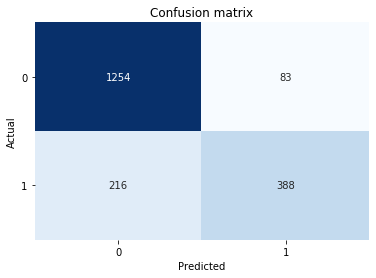

========= Eperiment -  df_A_len_3+bow+LR  =========


Info (NVML): NVML Shared Library Not Found. GPU usage metrics may not be reported. For more information, see https://docs-legacy.neptune.ai/logging-and-managing-experiment-results/logging-experiment-data.html#hardware-consumption 


https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-425
 ====  bow  ==== 


,Accuracy,F1-score,Recall,Precision,AUC
LR,0.845956,0.72186,0.642384,0.823779,0.790152


 ====  df_A_len_3  ==== 


,Accuracy,F1-score,Recall,Precision,AUC
LR+bow,0.845956,0.72186,0.642384,0.823779,0.790152


df_A_len_4+bow+LR
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1337
           1       0.80      0.64      0.71       604

    accuracy                           0.84      1941
   macro avg       0.83      0.78      0.80      1941
weighted avg       0.84      0.84      0.83      1941



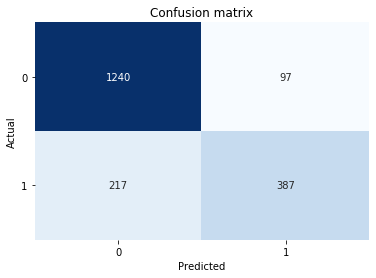

========= Eperiment -  df_A_len_4+bow+LR  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-426
 ====  bow  ==== 


,Accuracy,F1-score,Recall,Precision,AUC
LR,0.838228,0.711397,0.640728,0.799587,0.784089


 ====  df_A_len_4  ==== 


,Accuracy,F1-score,Recall,Precision,AUC
LR+bow,0.838228,0.711397,0.640728,0.799587,0.784089


df_A_len_5+bow+LR
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1337
           1       0.78      0.64      0.70       604

    accuracy                           0.83      1941
   macro avg       0.82      0.78      0.79      1941
weighted avg       0.83      0.83      0.83      1941



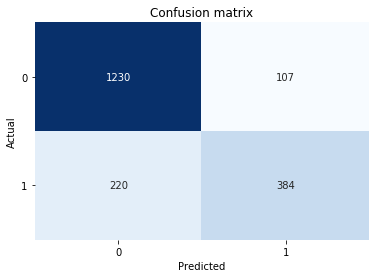

========= Eperiment -  df_A_len_5+bow+LR  =========
https://app.neptune.ai/codekcg23/Research-Experiments/e/RES-427
 ====  bow  ==== 


,Accuracy,F1-score,Recall,Precision,AUC
LR,0.83153,0.70137,0.635762,0.782077,0.777866


 ====  df_A_len_5  ==== 


,Accuracy,F1-score,Recall,Precision,AUC
LR+bow,0.83153,0.70137,0.635762,0.782077,0.777866


,Accuracy,F1-score,Recall,Precision,AUC
df_A_len_3+bow+LR,0.845956,0.721860,0.642384,0.823779,0.790152
df_A_len_4+bow+LR,0.838228,0.711397,0.640728,0.799587,0.784089
df_A_len_5+bow+LR,0.831530,0.701370,0.635762,0.782077,0.777866


Unexpected error in ping thread.
Traceback (most recent call last):
  File "C:\Users\Kavishka\anaconda3\lib\site-packages\neptune\internal\threads\ping_thread.py", line 37, in run
    self.__backend.ping_experiment(self.__experiment)
  File "C:\Users\Kavishka\anaconda3\lib\site-packages\neptune\internal\api_clients\hosted_api_clients\hosted_alpha_leaderboard_api_client.py", line 392, in ping_experiment
    self.leaderboard_swagger_client.api.ping(experimentId=str(experiment.internal_id)).response().result
  File "C:\Users\Kavishka\anaconda3\lib\site-packages\bravado\http_future.py", line 239, in response
    six.reraise(*sys.exc_info())
  File "C:\Users\Kavishka\anaconda3\lib\site-packages\six.py", line 703, in reraise
    raise value
  File "C:\Users\Kavishka\anaconda3\lib\site-packages\bravado\http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "C:\Users\Kavishka\anaconda3\lib\site-packages\bravado\http_future.py", line 124, 

In [33]:
df_dict = {'df_A_len_3':df_A_len_3,'df_A_len_4': df_A_len_4,'df_A_len_5' :df_A_len_5}
# model dict
model_dict = {"LR":utills.lr}
classifier_feature(df_dict, model_dict,{'bow':utills.bow_word})